# Проблема собственных значений и QR алгоритм

## QR алгоритм.



- QR алгоритм был предложен в 1961 г. независимо В. Н. Кублановской и Ј. Francis'ом. Статью про историю этого алгоритма и его авторов можно прочитать тут. https://www.atm.org.uk/write/MediaUploads/Resources/Mid_Plenary_FrancisGolub.pdf  

- Не путайте QR алгоритм и QR разложение!

- $\mathrm{QR}$ разложение - это представление матрицы в виде произведения двух матриц, а QR алгоритм использует QR разложение для вычисления разложения Шypa.

Рассмотрим выражение
$$
A=Q T Q^*
$$
и перепишем его в виде
$$
Q T=A Q
$$
Слева замечаем QR разложение матрицы $A Q$. 

Запишем следующий итерационный процесс
$$
Q_{k+1} R_{k+1}=A Q_k, \quad Q_{k+1}^* A=R_{k+1} Q_k^*
$$
Введём новую матрицу
$$
A_k=Q_k^* A Q_k=Q_k^* Q_{k+1} R_{k+1}=\widehat{Q}_k R_{k+1}
$$
тогда аппроксимация для $A_{k+1}$ имеет вид
$$
A_{k+1}=Q_{k+1}^* A Q_{k+1}=\left(Q_{k+1}^* A=R_{k+1} Q_k^*\right)=R_{k+1} \widehat{Q}_k .
$$


Итак, мы получили стандартную форму записи QR алгоритма.
Финальные формулы обычно записывают в QRRQ-форме:
1. Инициализируем $A_0=A$.
2. Вычислим QR разложение матрицы $A_k: A_k=Q_k R_k$.
3. Обновим аппроксимацию $A_{k+1}=R_k Q_k$.
Продолжаем итерации пока $A_k$ не станет достаточно треугольной (например, норма подматрицы под главной диагональю не станет достаточно мала). 

Утверждение
Матрицы $A_k$ унитарно подобны матрице $A$
$$
A_k=Q_{k-1}^* A_{k-1} Q_{k-1}=\left(Q_{k-1} \ldots Q_1\right)^* A\left(Q_{k-1} \ldots Q_1\right)
$$
а произведение унитарных матриц - унитарная матрица.
Сложность одной итерации $\mathcal{O}\left(n^3\right)$, если используется $\mathrm{QR}$ разложение для общего случая.
Мы ожидаем, что $A_k$ будет очень близка к треугольной матрице для достаточно большого $k$. 

In [ ]:
import numpy as np
n = 4
a = [[1.0/(i + j + 0.5) for i in range(n)] for j in range(n)]
niters = 200
for k in range(niters):
    q, rmat = np.linalg.qr(a)
    a = rmat.dot(q)
print('Leading 3x3 block of a:')
print(a[:3, :3])

Leading 3x3 block of a:
[[2.41052440e+000 6.60130676e-018 7.46669222e-018]
 [2.42500623e-168 3.49984625e-001 4.14993685e-017]
 [0.00000000e+000 6.56745067e-273 1.53236733e-002]]


## QR-алгоритм. Реализация.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def qr_algorithm(A, num_iter, eps):
    T = A.copy()
    U = np.eye(A.shape[0])
    conv = [(T, U)]
    for i in range(num_iter):
        Q, R = np.linalg.qr(T)
        T = R @ Q
        U = U @ Q
        conv.append((T, U))
        if np.sum(np.abs(np.tril(T, k=-1))) < eps:
            break
    return T, U, conv[1:]

In [ ]:
n = 7
A = np.random.randn(n, n)
# A = A.T @ A
A = A + A.T
true_eigvals, true_eigvec = np.linalg.eig(A)
print(true_eigvals)

[-4.48582349  5.57389863  3.85284524  2.8288769   1.03918933 -0.6891476
  0.28312425]


In [ ]:
T, U, conv = qr_algorithm(A, 2000, 1e-6)
print(np.linalg.norm(A - U @ T @ U.T))

4.382449849597428e-14


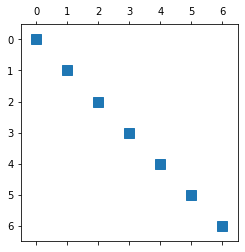

In [ ]:
plt.spy(T, markersize=10, precision=1e-6)


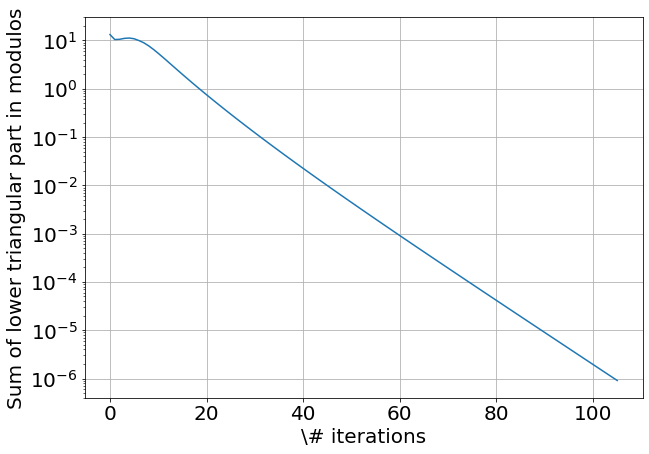

In [ ]:
plt.figure(figsize=(10, 7))
conv_qr = np.array([np.sum(np.abs(np.tril(T, k=-1))) for T, U in conv])
plt.plot(conv_qr)
plt.yscale("log")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("\# iterations", fontsize=20)
plt.ylabel("Sum of lower triangular part in modulos", fontsize=20)
plt.grid(True)

In [ ]:
U.round(4), true_eigvec.round(4)


(array([[-0.201 , -0.6686, -0.6272,  0.2665,  0.2186, -0.019 ,  0.0077],
        [ 0.3512,  0.0272, -0.152 , -0.1212,  0.0515, -0.4356,  0.8036],
        [ 0.2525, -0.2302, -0.2834, -0.6953, -0.4019,  0.3969, -0.0202],
        [ 0.6976, -0.3068,  0.2912,  0.0277,  0.5246,  0.1566, -0.184 ],
        [-0.0653,  0.555 , -0.4632, -0.2211,  0.6003,  0.2527, -0.0127],
        [-0.4624, -0.2859,  0.3395, -0.5989,  0.3793, -0.2943,  0.0018],
        [ 0.2603,  0.1243, -0.2977, -0.1498, -0.0925, -0.691 , -0.5655]]),
 array([[-0.6686, -0.201 , -0.6272, -0.2665, -0.2186,  0.019 , -0.0077],
        [ 0.0272,  0.3512, -0.152 ,  0.1212, -0.0515,  0.4356, -0.8036],
        [-0.2302,  0.2525, -0.2834,  0.6953,  0.4019, -0.3969,  0.0202],
        [-0.3068,  0.6976,  0.2912, -0.0277, -0.5246, -0.1566,  0.184 ],
        [ 0.555 , -0.0653, -0.4632,  0.2211, -0.6003, -0.2527,  0.0127],
        [-0.2859, -0.4624,  0.3395,  0.5989, -0.3793,  0.2943, -0.0018],
        [ 0.1243,  0.2603, -0.2977,  0.1498,  0.0

## Ускорение QR алгоритма

Матрица $A$ имеет верхне-гессенбергову форму, если
$a_{i j}=0$, при $i \geq j+2$.
$$
H=\left[\begin{array}{lllll}
* & * & * & * & * \\
* & * & * & * & * \\
0 & * & * & * & * \\
0 & 0 & * & * & * \\
0 & 0 & 0 & * & *
\end{array}\right]
$$ 

С помощью отражений Хаусхолдера можно привести любую матрицу к верхне-гессенберговой форме:
$$
U^* A U=H .
$$
- Сложность такого приведения $\mathcal{O}\left(n^3\right)$ операций
- Если матрица приведена к верхне-гессенберговой форме, то одна итерация QR алгоритма имеет сложность $\mathcal{O}\left(n^2\right)$ операций (например, используя вращения Гивенса) (почему?)
- Также верхне-гессенбергова форма матрицы сохраняется после выполнения одной итерации QR алгоритма (проверим ниже). 

Матрица Хаусхолдера - это матрица вида
$$
H \equiv H(v)=I-2 v v^*,
$$
где $v-n \times 1$ вектор и $v^* v=1$. Покажите, что $H$ унитарна и Эрмитова. Это также матрица отражения относительно плоскости с нормалью $v$ :
$$
H x=x-2\left(v^* x\right) v
$$ 

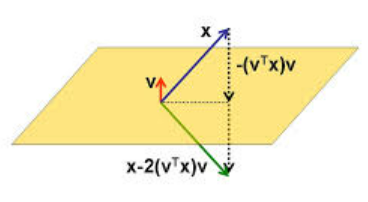 

**Свойство матрицы Хаусхолдера.**


Преобразование Хаусхолдера может занулить все элементы в столбце матрицы, кроме первого:
$$
H\left[\begin{array}{c}
\times \\
\times \\
\times \\
\times
\end{array}\right]=\left[\begin{array}{l}
\times \\
0 \\
0 \\
0
\end{array}\right]
$$  

Доказательство 

Пусть $e_1=(1,0, \ldots, 0)^T$, тогда нам надо найти такой вектор $v$ что
$$
H x=x-2\left(v^* x\right) v=\alpha e_1,
$$
где $\alpha$ неизвестная константа. В силу унитарной инвариантности $\|\cdot\|_2$ мы получим
$$
\|x\|_2=\|H x\|_2=\left\|\alpha e_1\right\|_2=|\alpha| .
$$
и
$$
\alpha=\pm\|x\|_2
$$
Также, можем выращить $v$ из равенства $x-2\left(v^* x\right) v=\alpha e_1$ :
$$
v=\frac{x-\alpha e_1}{2 v^* x}
$$
Умножив последнее выражение на $x^*$ получим
$$
\begin{gathered}
x^* x-2\left(v^* x\right) x^* v=\alpha x_1 ; \\
\|x\|_2^2-2\left(v^* x\right)^2=\alpha x_1 \\
\left(v^* x\right)^2=\frac{\|x\|_2^2-\alpha x_1}{2} .
\end{gathered}
$$
Итак, $v$ существует и равна
$$
v=\frac{x \pm\|x\|_2 e_1}{2 v^* x}=\frac{x \pm\|x\|_2 e_1}{\pm \sqrt{2\left(\|x\|_2^2 \mp\|x\|_2 x_1\right)}}
$$ 

Случай симметричной (эрмитовой) матрицы


- Если матрица $A$ симметричная (эрмитова), то $A=A^*$, тогда $H=H^*$ и верхне-гессенбергова форма оказывается трёхдиагональной матрицей
- Далее мы будем говорить только о симметричном трёхдиагональном виде верхне-гессенберговой формы
- Любая эрмитова матрица может быть приведена к трёхдиагональной форме с помощью отражений Хаусхолдера
- Основная идея: трёхдиагональная форма сохраняется при выполнении QR алгоритма, и сложность одной итерации может быть сокращена до $\mathcal{O}(n)$ ! 

## Одна итерация QR алгоритма сохраняет верхне-гессенбергову форму матрицы.

- Одна итерация QR алгоритма имеет следующий вид:
$$
A_{k}=Q_{k} R_{k}, \quad A_{k+1}=R_{k} Q_{k}
$$
- Если $A_0 = A$ симметричная трёхдиагональная матрица , то эта форма сохраняется.
- Давайте это проверим!

array([-2.69714057,  0.58790971,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

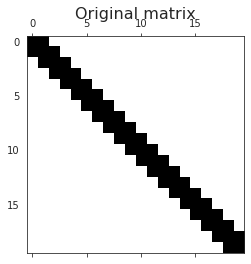

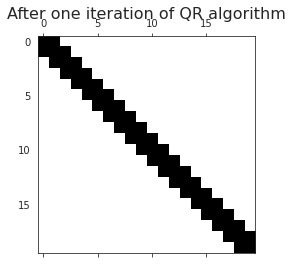

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

#Generate a random tridiagonal matrix
n = 20
d = np.random.randn(n)
sub_diag = np.random.randn(n-1)

mat = np.diag(d) + np.diag(sub_diag, -1) + np.diag(sub_diag, 1)
plt.spy(mat)
plt.title("Original matrix", fontsize=16)
q, r = np.linalg.qr(mat)
plt.figure()
b = r.dot(q)
b[abs(b) <= 1e-12] = 0
plt.spy(b)
plt.title("After one iteration of QR algorithm", fontsize=16)
#plt.figure()
#plt.imshow(np.abs(r.dot(q)))
b[0, :]

Трёхдиагональная форма


- Работая с трёхдиагональной формой, вам не нужно вычислять матрицу $Q$ : нужно лишь вычислить трёхдиагональную часть, которая получается после итерации
$$
A_k=Q_k R_k, \quad A_{k+1}=R_k Q_k
$$
в случае $A_k=A_k^*$
- Такая матрица определяется $\mathcal{O}(n)$ параметрами
- Вычисление QR разложения более сложное, но возможно вычислить $A_{k+1}$ напрямую без вычисления $Q_k$.
- Это называется неявный QR-шаr.


Теорема о неявном QR алгоритме

- Bce реализации неявного QR алгоритма основаны на следующей теореме

Теорема. 

Пусть
$$
Q^* A Q=H
$$
верхне-гессенбергова форма матрицы. Тогда первый столбец матрицы $Q$ определяет все остальные её столбцы. Он может быть найден из следующего уравнения
$$
A Q=Q H
$$  

## QR со сдвигами, степенной метод, итерации Рэлея и обратные итерации, SVD.

Сходимость QR алгоритма
- Сходимость QR алгоритма - непростой вопрос (см. Е.Е. Тыртышников "Краткий курс численного анализа")!
Итог. Если у нас есть разложение вида
$$
A=X \Lambda X^{-1}, \quad A=\left[\begin{array}{ll}
A_{11} & A_{12} \\
A_{21} & A_{22}
\end{array}\right]
$$
и
$$
\Lambda=\left[\begin{array}{cc}
\Lambda_1 & 0 \\
0 & \Lambda_2
\end{array}\right], \quad \lambda\left(\Lambda_1\right)=\left\{\lambda_1, \ldots, \lambda_m\right\}, \lambda\left(\Lambda_2\right)=\left\{\lambda_{m+1}, \ldots, \lambda_r\right\}
$$
а также есть зазор между собственными значениями в матрице $\Lambda_1$ и $\Lambda_2\left(\left|\lambda_1\right| \geq \cdots \geq\left|\lambda_m\right|>\left|\lambda_{m+1}\right| \geq \cdots \geq\left|\lambda_r\right|>0\right)$, тогда блок $A_{21}^{(k)}$ матрицы $A_k$ сходится к нулевому в процессе работы QR алгоритма со скоростью
$$
\left\|A_{21}^{(k)}\right\| \leq C q^k, \quad q=\left|\frac{\lambda_{m+1}}{\lambda_m}\right|,
$$
где $m$ размер матрицы $\Lambda_1$
Таким образом, нам нужно увеличить зазор между $\Lambda_1$ и $\Lambda_2$. Это можно сделать с помощью QR алгоритма со сдвигами.

**QR алгоритм со сдвигами**

$$
A_k-s_k I=Q_k R_k, \quad A_{k+1}=R_k Q_k+s_k I
$$
- Сходимость такого алгоритма линейная с фактором
$$
\left|\frac{\lambda_{m+1}-s_k}{\lambda_m-s_k}\right|
$$

где $\lambda_m-m$-ое большее по модулю собственное значение. Если сдвиг близок к собственному вектору, сходимость более быстрая.
- Существуют различные стратегии выбора сдвигов.
- Использование сдвигов - это общий подход к ускорению сходимости итерационных методов вычисления собственных значений. Далее покажем, как выбирать сдвиги для более простых алгоритмов

**Сдвиги и степенной метод**


Напоминаем, что такое степенной метод для вычисления собственых значений.
$$
x_{k+1}:=A x_k, \quad x_{k+1}:=\frac{x_{k+1}}{\left\|x_{k+1}\right\|} .
$$
- Он сходится к собственному вектору, соответствующему максимальному по модулю собственному значению.
- Сходимость может быть очень медленной.
- Используем сдвиги: если мы преобразуем матрицу
$$
A:=A-\lambda_k I,
$$
то соответствующее собственное значение уменьшится (а нам нужно максимальное по модулю). Это не то, что нам было нужно!

**Обратная итерация и итерация Релея**

- Для того чтобы из малого собственного значения сделать большое, нам нужно обратить матрицу, и это приводит нас к методу обратной итерации
$$
x_{k+1}=(A-\lambda I)^{-1} x_k,
$$
где $\lambda$ - сдвиг, который близок к собственному значению, которое мы хотим найти. Аналогично степенному методу сходимость линейная.
- Для ускорения сходимости можно использовать итерацию Релея, которая задаётся с помощью адаптивного выбора параметра сдвига:
$$
\begin{aligned}
x_{k+1} &=\left(A-\lambda_k I\right)^{-1} x_k, \\
\lambda_k &=\frac{\left(A x_k, x_k\right)}{\left(x_k, x_k\right)}
\end{aligned}
$$
В симметричном случае $A=A^*$ сходимость локально кубическая, и локально квадратичная иначе.

**Сингулярные значения и собственные значения**

- Сингулярное разложение имеет вид
$$
A=U \Sigma V^*
$$
и существует для любой матрицы.
- Его также можно считать способом приведения данной матрицы к диагональному виду с помощью двух унитарных преобразований:
$$
\Sigma=U^* A V .
$$
- С помощью двусторонних преобразований Хаусхолдера мы можем привести любую матрицу к бидиагональной форме $B$.

Неявный QR алгоритм (со сдвигами) вычисляет собственные значения. Но мы не можем применить его напрямую к бидиагональной матрице, поскольку она может быть недиагонализуема в общем случае.
Однако задачу вычисления сингулярного разложения можно свести к симметричной задаче на собственные значения двумя способами:
1. Работать с трёхдиагональной матрицей
$$
T=B^* B
$$
2. Работать с расширенной матрицей
$$
T=\left[\begin{array}{cc}
0 & B \\
B^* & 0
\end{array}\right]
$$
Случай 1 практически реализуем, если не формировать матрицу $T$ явно!
Таким образом, задача вычисления сингулярных чисел может быть сведена к задаче вычисления собственных чисел симметричной трёхдиагональной матрицы.

# Алгоритмы для симметричной задачи на собственные значения


Рассмотрены выше были:

-QR алгоритм: "золотой стандарт" для вычисления собственных значений

-Метод итерации Релея

$$
\
$$
Далее:


-Алгоритм на основе стратегии "разделяй и властвуй"

-Метод бисекции

-Метод Якоби

## Метод разделяй и властвуй


Пусть у нас есть трёхдиагональная матрица и мы разделили её на блоки:
$$
T=\left[\begin{array}{cc}
T_1^{\prime} & B \\
B^{\top} & T_2^{\prime}
\end{array}\right]
$$
Можем записать матрицу $T$ в виде
$$
T=\left[\begin{array}{cc}
T_1 & 0 \\
0 & T_2
\end{array}\right]+b_m v v^*
$$
где $v v^*$ - матрица ранга $1, v=(0, \ldots, 0,1,1,0, \ldots, 0)^T$.
Пусть мы уже разложили матрицы $T_1$ и $T_2$ :
$$
T_1=Q_1 \Lambda_1 Q_1^*, \quad T_2=Q_2 \Lambda_2 Q_2^*
$$
Тогда (проверьте!),
$$
\left[\begin{array}{cc}
Q_1^* & 0 \\
0 & Q_2^*
\end{array}\right] T\left[\begin{array}{cc}
Q_1 & 0 \\
0 & Q_2
\end{array}\right]=D+\rho u u^*, \quad D=\left[\begin{array}{cc}
\Lambda_1 & 0 \\
0 & \Lambda_2
\end{array}\right]
$$
то есть мы свели задачу к задаче вычисления собственных значений у матрицы вида
диагональная матрица плюс матрица малого ранга. Решение задачи изложено в теории в  семинарских задачах   10 - 13.

## Метод бисекции

- Абсолютно другой подход основан на идеи бисекции
- Дана матрица $A$, инерция которой определяется как триплет $(\nu, \zeta, \pi)$, где $\nu$ - число отрицательных, $\zeta$ - число нулевых, и $\pi$ - число положительных собственных значений.
- Если $X$ невырождена, тогда
$\operatorname{Inertia}(A)=\operatorname{Inertia}\left(X^* A X\right)$

**Бисекция с помощью метода Гаусса**


- Для данного z мы можем запустить метод Гаусса и получить разложение:
$$
A-z I=L D L^*
$$
а инерция для диагональной матрицы вычисляется просто.
- С помощью инерции мы можем легко посчитать число собственных значений в заданном интервале.
- Пример: если $\operatorname{Inertia}(A)=(5,0,2)$ и после сдвига $\operatorname{Inertia}(A-z I)=(4,0,3), z \in[a, b]$ тогда это значит, что $\lambda(A) \in[a, z]$.

## Метод Якоби


- Вспомним что такое вращения Гивенса (Якоби):
на плоскости им соответствуют ортогональные матрицы вида
$$
\left(\begin{array}{cc}
\cos \phi & \sin \phi \\
-\sin \phi & \cos \phi
\end{array}\right)
$$
а в $n$-мерном пространстве мы выбираем два индекса і и ји вращаем относительно соответствующих элементов $n$-мерного вектора.

- Идея метода Якоби состоит в минимизации суммы квадратов недиагональных элементов:
$$
\Gamma(A)=\operatorname{off}\left(U^{*} A U\right), \quad \text { off }^{2}(X)=\sum_{i \neq j}\left|X_{i j}\right|^{2}=\|X\|_{F}^{2}-\sum_{i=1}^{n} x_{i i}^{2}
$$
с помощью последовательных вращений Якоби для их зануления.
- Когда элементы выбраны, их легко занулить.
- Главный вопрос: в каком порядке нужно проводить зануление?
- Если мы всегда зануляем максимальный недиагональный элемент, метод имеет глобально линейную сходимость и локально квадратичную.
- На практике используется циклический порядок $\text { (то есть, }(1,2),(1,3), \ldots,(2,3), \ldots) $

Метод Якоби был первым численным методом для вычисления собственных значений, предложен в 1846. Преимущество:

Большая константа в оценке сложности

Очень точный (высокая относительная точность для малых собственных значений по сравнению с другими методами)

Хорошая возможность параллелизации 

# Выводы по способам вычисления разложений


- LU и QR разложения можно вычислить с помощью прямых методов за конечное число операций.
- SVD и разложение Шура не могут быть вычислены с помощью прямых методов (почему?). Они могут быть получены с помощью итерационных методов
- Однако итерационные методы также имеют сложность $\mathcal{O}\left(n^3\right)$ операций благодаря быстрой сходимости. 